In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.cluster import KMeans,MiniBatchKMeans
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np
import pandas as pd  

<h2>Q1 : Use K-means to segment the image and show the variation visually by selecting different number of clusters - 7 Marks</h2>

In [2]:
## As the Assignment was to load 2 images and do repeative action . Hence the class is made to repeat the same work. 

class ImageSegmentation : 
    ##initializer
    def __init__(self,img,minCluster=1, maxCluster=6,figure_size = 15):
        self.img= mpimg.imread(img)
        ##print("img shape",str(self.img.shape))
        self.minCluster=minCluster
        self.maxCluster=maxCluster
        self.x, self.y, self.z = self.img.shape
        self.image_2d = self.img.reshape(self.x * self.y, self.z)
        ##print(self.image_2d.shape)
        #self.image_2d = self.img.reshape(-1,3)
        self.inertias = []
        self.figure_size = figure_size 
        self.clusterData ={}
 
        
        #Run Mini Batch for given K (n_clusters)
    def __KMeansAlgo (self,n_clusters):
        dictData ={}
        km = MiniBatchKMeans( n_clusters=n_clusters)
        km.fit(self.image_2d  )
        dictData['means'] = km.cluster_centers_
        dictData['labels'] = km.labels_
        dictData['inertia']=km.inertia_
        return dictData    
        
    ## To Find the Right K run the elbow method
    def generateElbowMethod(self,display =True):

        ## Run the Mini Batch KMeans for min to max cluster 
        ## and keep it in dict data which will be used to display segmented image.    
        for n_clusters in range(self.minCluster, self.maxCluster) :
            dictData = self.__KMeansAlgo(n_clusters)
            self.clusterData[n_clusters]=dictData
            self.inertias.append(dictData['inertia']) 
        ## Display the Elbow Method     
        if display : 
            plt.plot(range(self.minCluster,self.maxCluster), self.inertias)
            plt.xlabel('Number of clusters')
            plt.ylabel('J')
            plt.show()
            
            self.showCompressedImage()
    ## Display the images which are compressed using Mini Batch K means algo 
    def showCompressedImage(self):
        if bool(self.clusterData )==False : 
            self.generateElbowMethod()
        j=1
        plt.figure(figsize=(self.figure_size,self.figure_size)) 
        plt.subplot(1,2,j),plt.imshow(self.img)
        plt.title('Original Image')   
        for n_cluster in self.clusterData : 
            j=j+1
            dictData =self.clusterData[n_cluster]
            ##print(dictData)
            means = dictData['means'].astype('uint8')
            plt.subplot(1,2,j),plt.imshow(means[dictData['labels' ]].reshape(self.x, self.y, self.z))
            plt.title('Segmented Image when K = %i' % n_cluster) 
            if  j==2 :
                plt.show()
                plt.figure(figsize=(self.figure_size,self.figure_size))
                j=0
        plt.show()
    ## Display the individual Image         
    def showImage(self,n_cluster):
        dictData=None
        if n_cluster in self.clusterData :
            dictData =self.clusterData[n_cluster]
        else : 
            dictData = self.__KMeansAlgo(n_clusters)
        plt.figure(figsize=(self.figure_size,self.figure_size)) 
        means = dictData['means'].astype('uint8')
        plt.imshow(np.array(means[dictData['labels' ]].reshape(self.x, self.y, self.z),np.int32))
        plt.title('Using elbow method selected sagmented image =' + str(n_cluster) ,fontdict={'fontsize': 18, 'fontweight': 'medium'})
        plt.show()

<h2> Processing for Image1.jpeg</h2>
<h3 style="color:blue"><ul><li>Running KMeans Batch Algo for K =1 to 20 </li><li> Finding Right K using Elbow Approach. </li><li>Display of compressed image for different K </li></ul></h3>

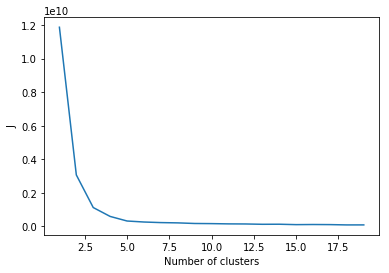

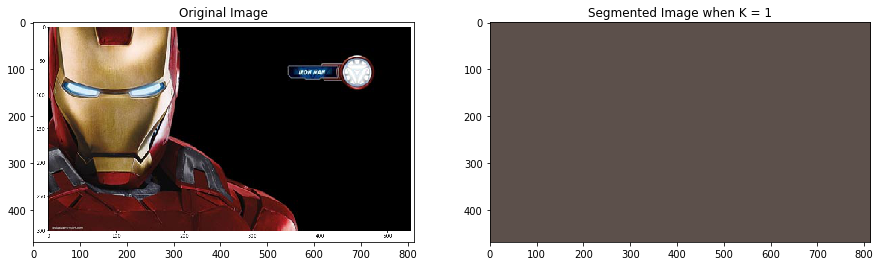

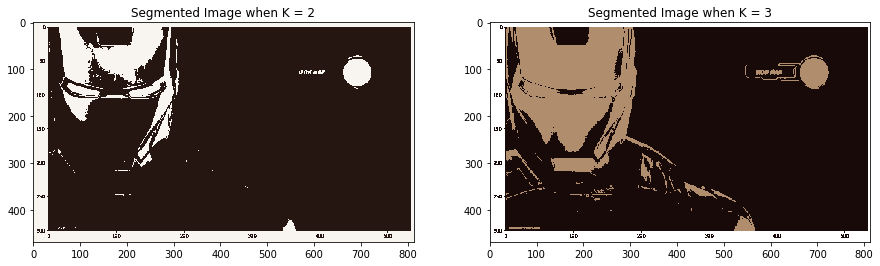

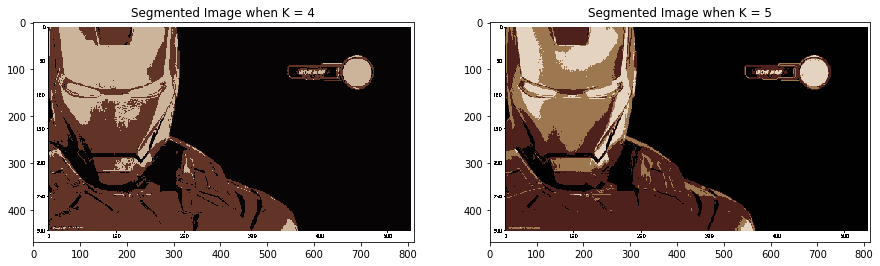

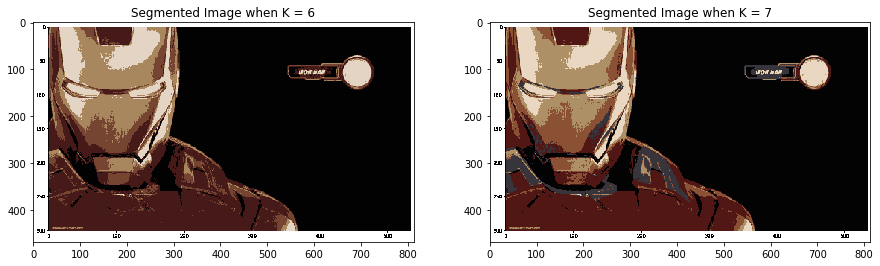

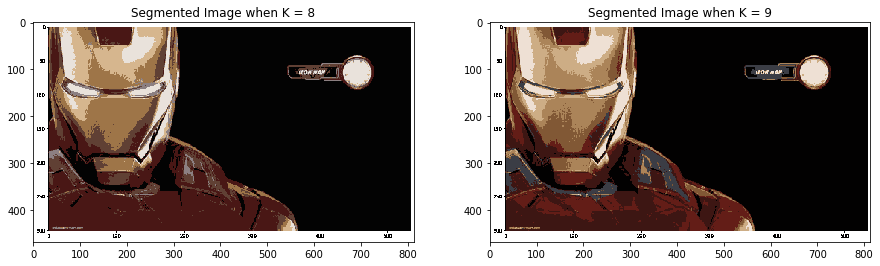

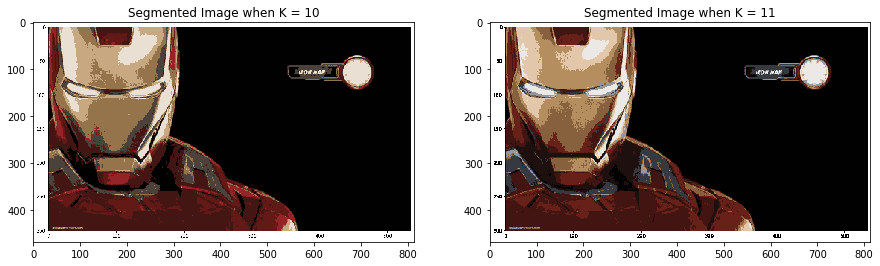

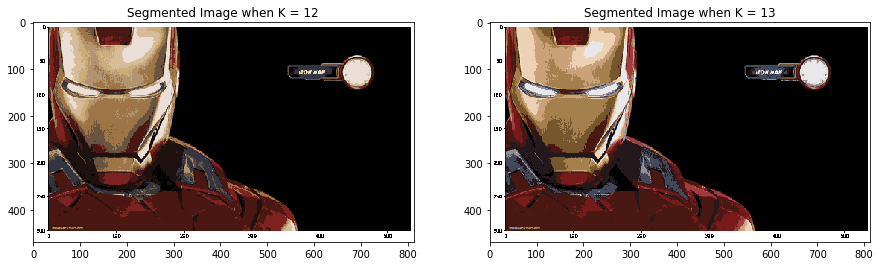

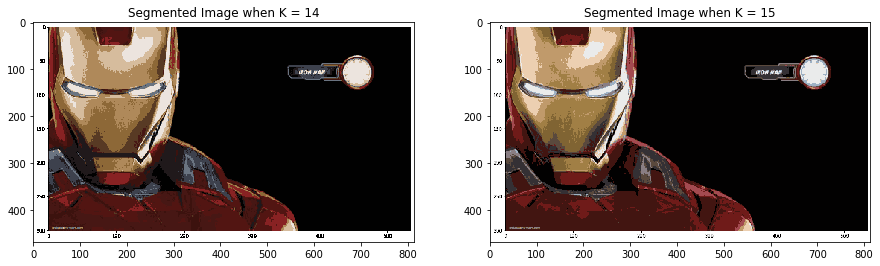

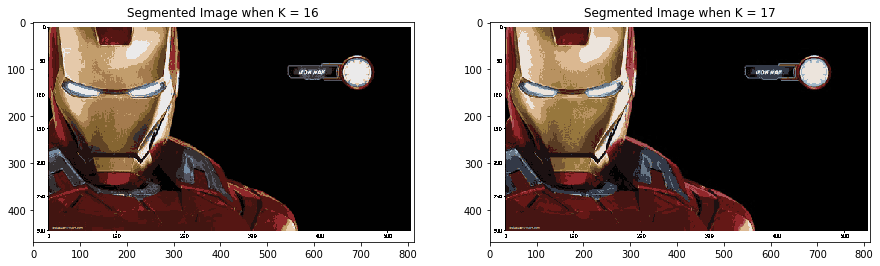

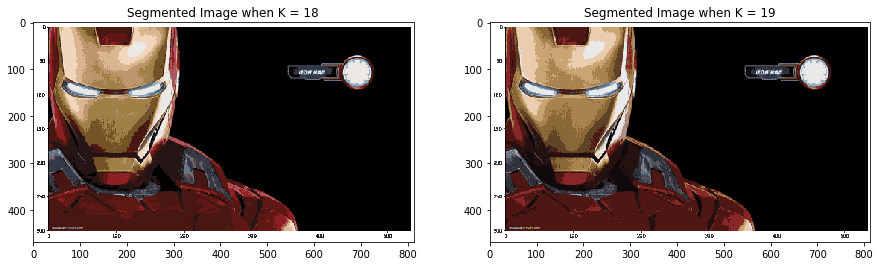

<Figure size 1080x1080 with 0 Axes>

In [3]:
imgSeg = ImageSegmentation('Image1.jpeg',maxCluster=20)
imgSeg.generateElbowMethod()
##imgSeg.showCompressedImage()


<h3 style="color:blue">Display Of Compressed Image for K=5</h3> 

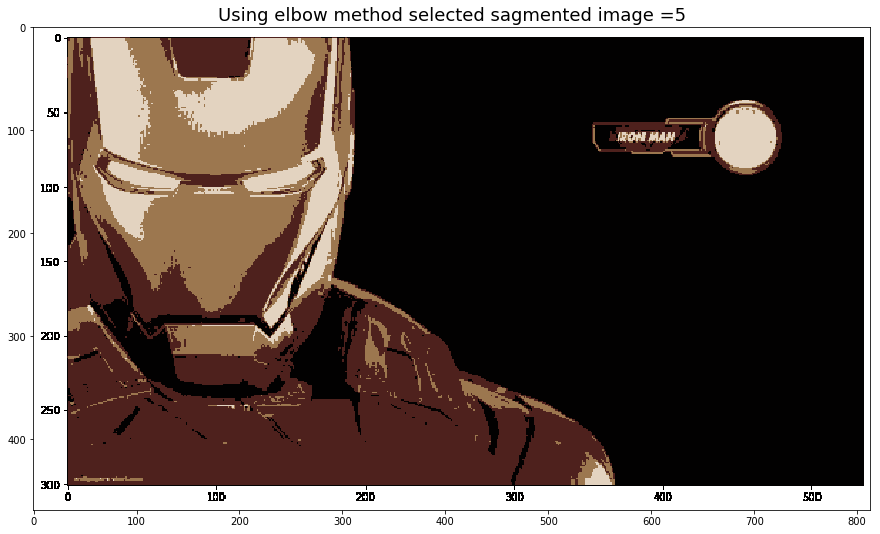

In [4]:
imgSeg.showImage(5)

<h2> Processing for Image2.jpeg</h2>
<h3 style="color:blue"><ul><li>Running KMeans Batch Algo for K =1 to 20 </li><li> Finding Right K using Elbow Approach. </li><li>Display of compressed image for different K </li></ul></h3>

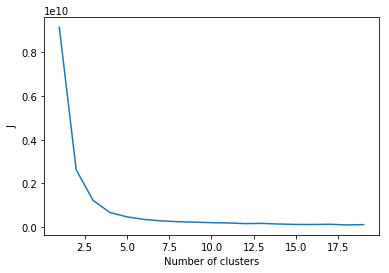

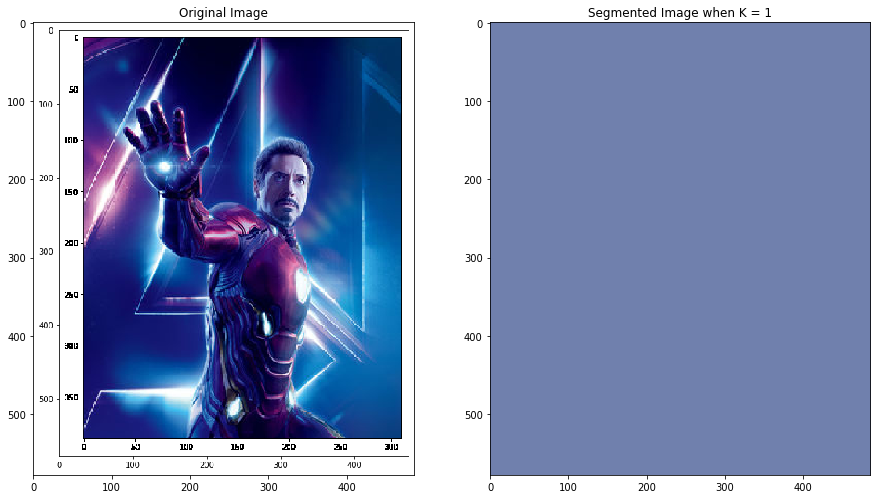

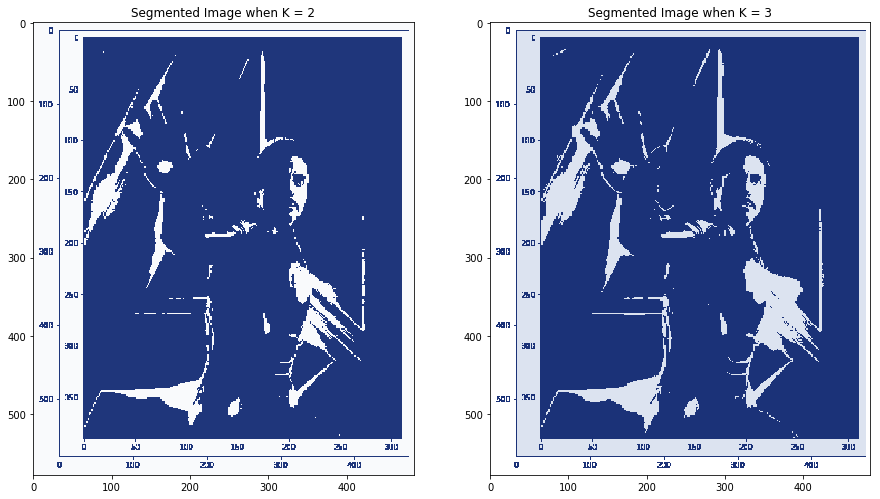

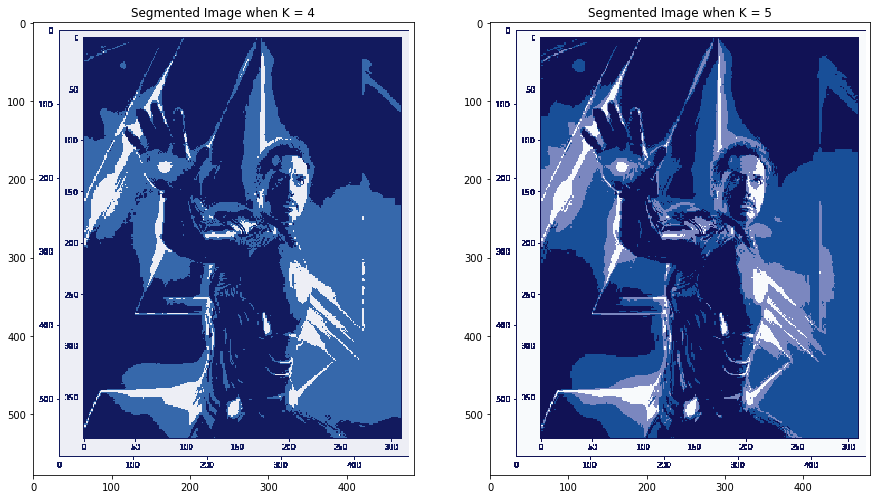

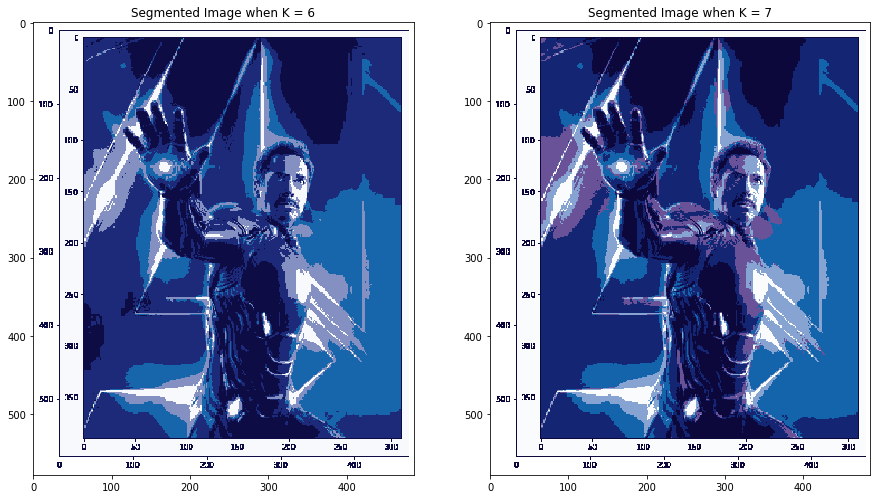

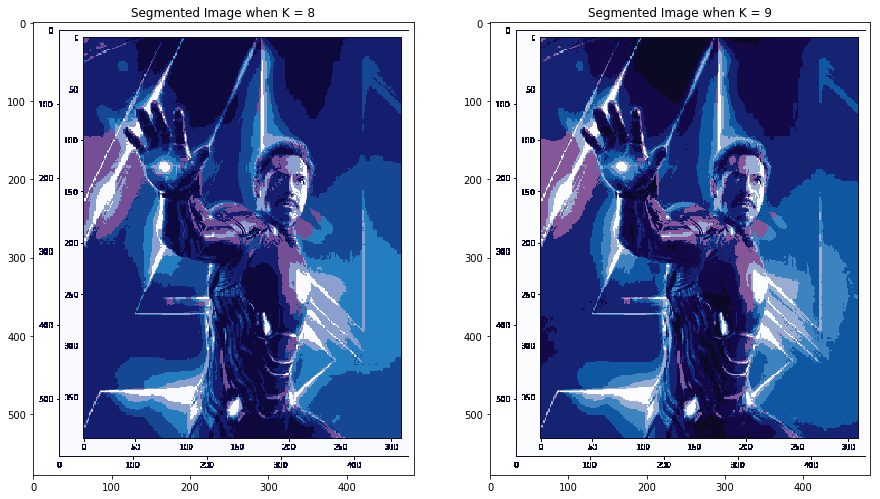

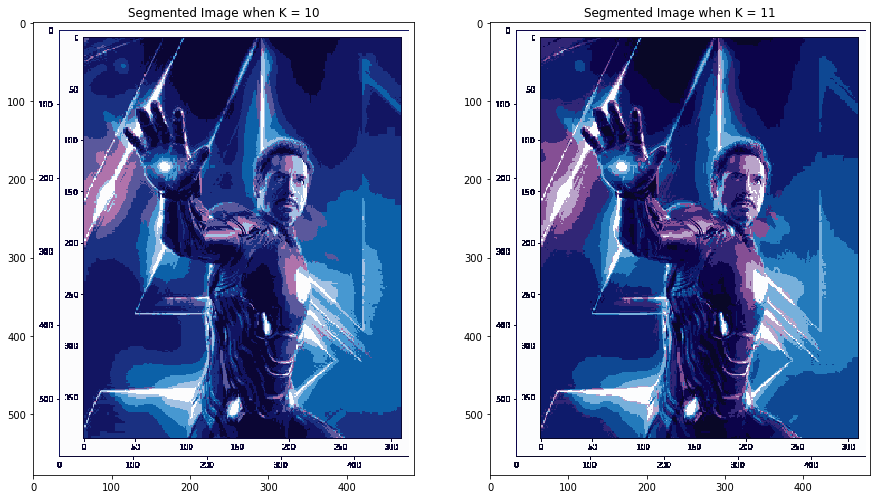

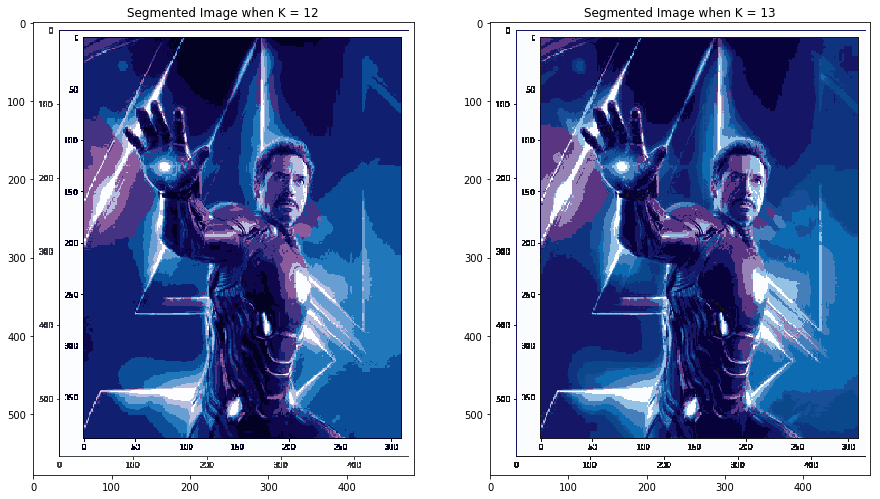

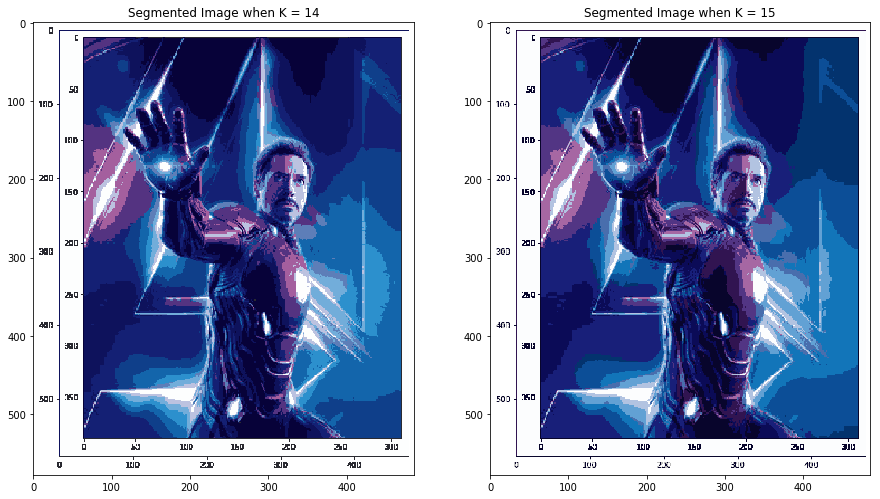

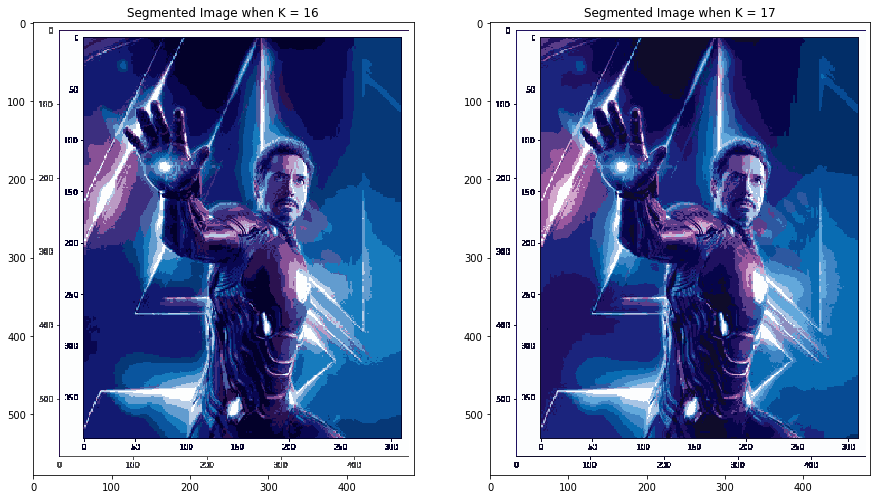

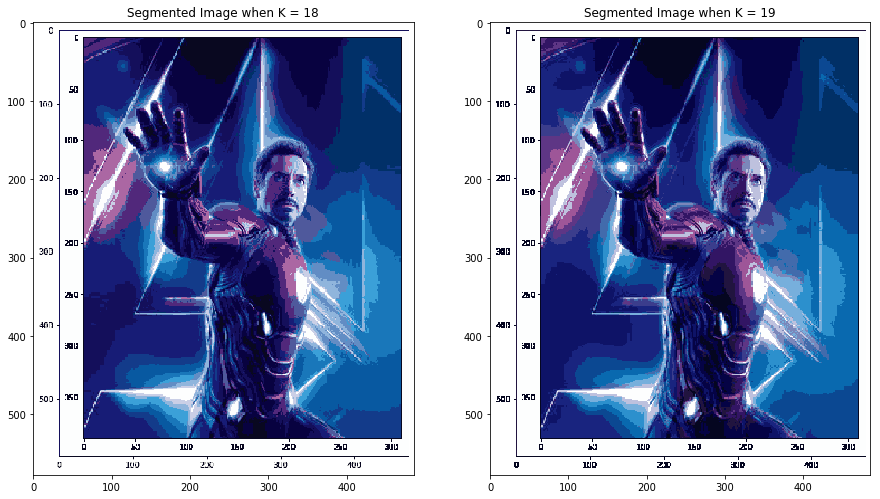

<Figure size 1080x1080 with 0 Axes>

In [5]:
imgSeg2 = ImageSegmentation('image2.jpeg',maxCluster=20)
imgSeg2.generateElbowMethod()


<h3 style="color:blue">Display Of Compressed Image for K=5</h3> 

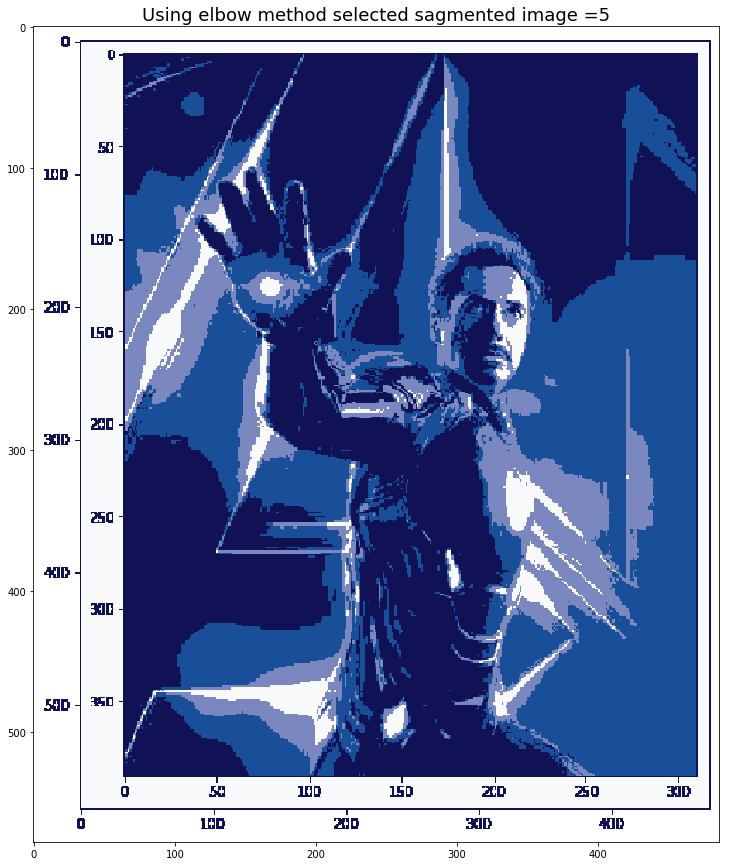

In [6]:
imgSeg2.showImage(5)

<h2> Q2 : Demonstrate  the role of various aspects initialization, learning rate on the quality of optimization - 8 Marks</h2>
 

<h3 style="color:blue">Initialization</h3> 
<p style="color:blue">K means algo largely depends on initialization and learning rate. KMeans accuracy /time efficiency depends on these parameter . For example if the initialization points are picked up dense cluster then the convergence will happen fast. But if the initial points are chosen Random /away from clusters or noise points then algo will not provide good result. To showcase initialization effect, I have run the KMeans with different initialization parameter like </p><b><ul><li>'k-means++'</li><li>'random'</li><li>manually_selected points --> We can see when the initalization points are not initalized properly then image quality will not be good and and iteration count will be higher</li></ul> </b>
<p style="color:blue">By using different parameter the performance of KMeans differs hence the output</p>

<h3 style="color:blue">Learning Rate</h3> 
<p style="color:blue"> In case of large Data, KMeans does not perform well in compare of Mini Batch. The reason is KMeans loads complete data to find minima, while MiniBatch overcome this problem by randomly selecting the batch size data point and trying to find optimal solution. To find the optimal solution, it uses learning rate. As the data points increases the learning rate descrease and effect of learning rate on centroid become very less. By doing this we get centroid faster. <b style="color:red"> This effect is explained in other pynb file as its require custom development of mini batch algo </b></p> 
<p>Here we have explained one more comparsion of Mini Batch vs KMeans (Or can say effect of initalization /batch size and learning rate). The comparsion is done on following points (I have tuned the parameter to comparsion) : <ul><li>Iteration Count --> As we increase cluster, both are taking almost same iteration (while mini batch does not use full data) </li><li>Distortion Value/J --> Same in both the case </li><li>Time Taken to Compute --> As cluster increases, K Means takes more time </li></ul></p>

In [7]:
class kMeanRoleOfInitalization:
    def __init__(self,img, figure_size = 10):
        self.imgName=img
        self.img= mpimg.imread(img)
        self.cluster=5
        self.x, self.y, self.z = self.img.shape
        self.image_2d = self.img.reshape(self.x * self.y, self.z)
        self.figure_size=figure_size
        self.index =0
        plt.figure(figsize=(self.figure_size,self.figure_size)) 
        self.tableData=[]
        
    def __run__(self,init):
        
        init_type = init if isinstance(init, str) else 'ndarray'
        self.index=self.index+1   
        print(">> init="+init_type)
        if init_type=='ndarray':
            print("initial mean : ")
            print(str(init))
        km = KMeans( n_clusters=self.cluster,n_init=1,init=init)
        km.fit(self.image_2d  )
        #print( "Iteration Count :"+str(km.n_iter_)+"  Sum of squared distances  : "+str(km.inertia_))
        plt.figure(figsize=(self.figure_size,self.figure_size)) 
        means = km.cluster_centers_.astype('uint8')
        plt.imshow(np.array(km.cluster_centers_[km.labels_].reshape(self.x, self.y, self.z),np.int32))
        plt.title("Ex : "+str(self.index)+"init: "+str(init_type)+" , Iter Count : "+str(km.n_iter_)+" , J Value : "+str(round(km.inertia_,2)),fontdict={'fontsize': 14, 'fontweight': 'medium'})
        self.tableData.append([self.index, init_type,km.n_iter_,round(km.inertia_,2)])
        plt.show()
        return km

        
    def showEffect(self):
        init='k-means++'
        km=self.__run__(init)
        init='random'
        km=self.__run__(init)
        
            
        
        init=np.array([[0,0,0,0],[50,50,50,0],[100,100,100,0],[150,150,150,0],[200,200,200,0]], np.int32)
        km=self.__run__(init)
        #print( "Iteration Count :"+str(km.n_iter_)+"  Sum of squared distances  : "+str(km.inertia_))

        init=np.array([[0,0,0,0],[5,5,5,0],[10,10,10,0],[15,15,15,0],[20,20,20,0]], np.int32)
        km=self.__run__(init)
            
        #print( "Iteration Count :"+str(km.n_iter_)+"  Sum of squared distances  : "+str(km.inertia_))

        init=np.array([[0,0,0,0],[1,1,1,1],[125,125,125,125],[250,250,250,250],[255,255,255,255]], np.int32)
        km=self.__run__(init)
        #print( "Iteration Count :"+str(km.n_iter_)+"  Sum of squared distances  : "+str(km.inertia_))

        
        init='random'
        km=self.__run__(init)
        #print( "Iteration Count :"+str(km.n_iter_)+"  Sum of squared distances  : "+str(km.inertia_))
    

>> init=k-means++


<Figure size 720x720 with 0 Axes>

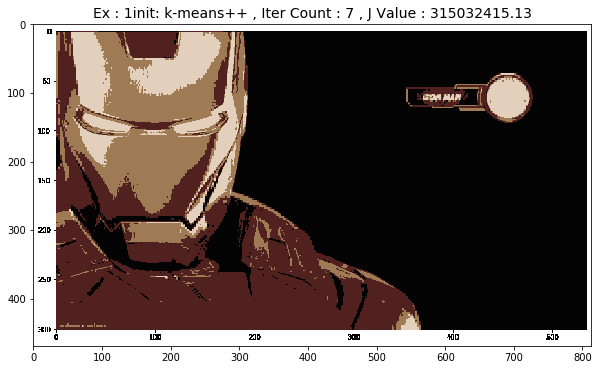

>> init=random


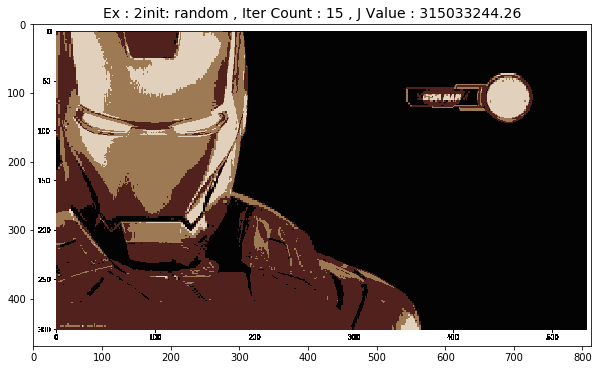

>> init=ndarray
initial mean : 
[[  0   0   0   0]
 [ 50  50  50   0]
 [100 100 100   0]
 [150 150 150   0]
 [200 200 200   0]]


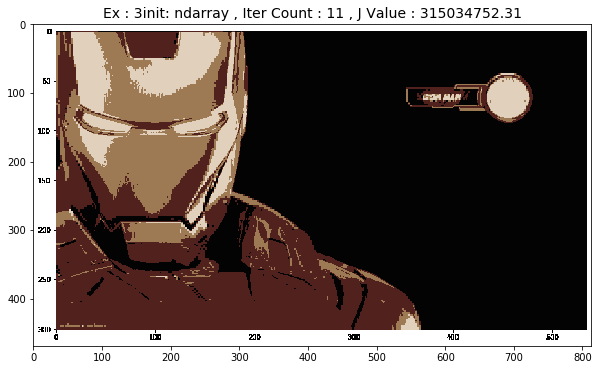

>> init=ndarray
initial mean : 
[[ 0  0  0  0]
 [ 5  5  5  0]
 [10 10 10  0]
 [15 15 15  0]
 [20 20 20  0]]


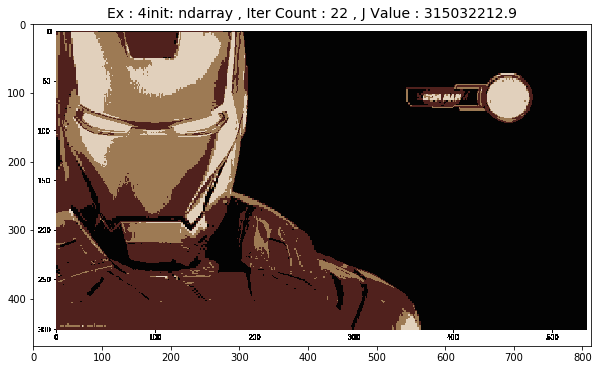

>> init=ndarray
initial mean : 
[[  0   0   0   0]
 [  1   1   1   1]
 [125 125 125 125]
 [250 250 250 250]
 [255 255 255 255]]


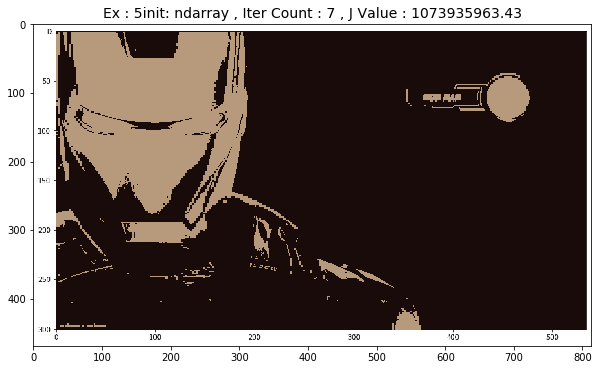

>> init=random


C:\Users\vipinv\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return_n_iter=True)


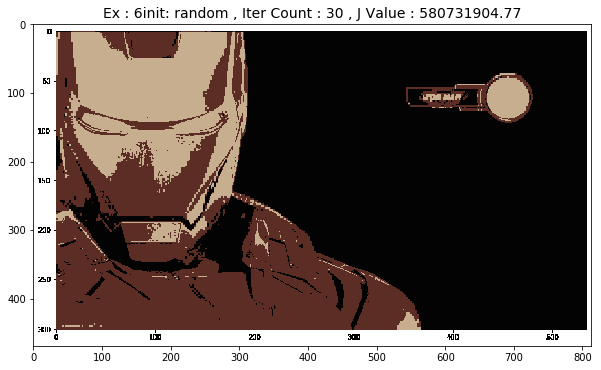

In [8]:
kMeanAlgo =kMeanRoleOfInitalization('Image1.jpeg')
kMeanAlgo.showEffect()


In [9]:
df=pd.DataFrame(kMeanAlgo.tableData,columns = ['SNO', 'initiation Approach','Iteration Count','Distoration/J Value'])     
df.style.set_caption("Peformance of K Means with different type of initalizer ")
def highlight_cols(s):
    is_max = s == s.max()
    return ['background-color: red' if v else '' for v in is_max]

df.style.apply(highlight_cols, subset=pd.IndexSlice[:, ['Iteration Count','Distoration/J Value']])

,SNO,initiation Approach,Iteration Count,Distoration/J Value
0,1,k-means++,7,3.15032e+08
1,2,random,15,3.15033e+08
2,3,ndarray,11,3.15035e+08
3,4,ndarray,22,3.15032e+08
4,5,ndarray,7,1.07394e+09
5,6,random,30,5.80732e+08


>> init=k-means++


<Figure size 720x720 with 0 Axes>

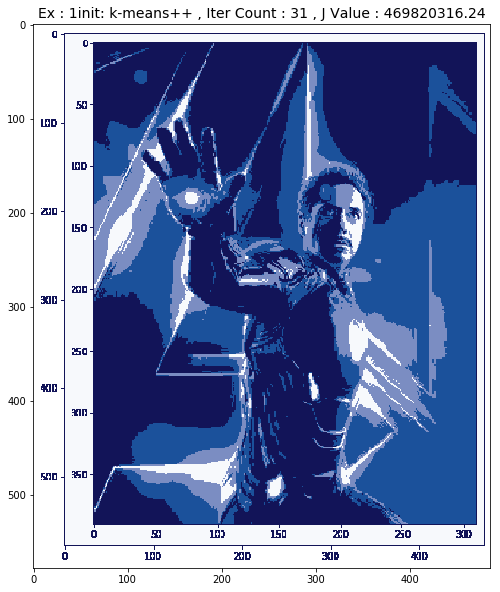

>> init=random


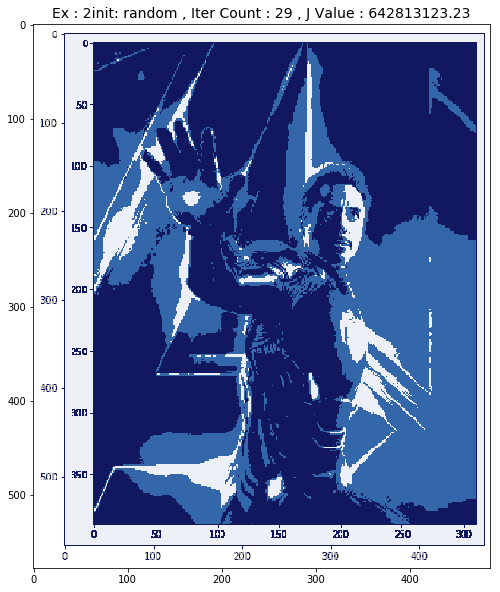

>> init=ndarray
initial mean : 
[[  0   0   0   0]
 [ 50  50  50   0]
 [100 100 100   0]
 [150 150 150   0]
 [200 200 200   0]]


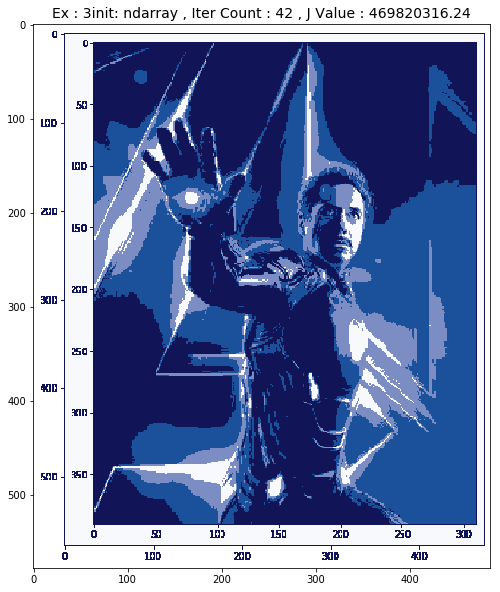

>> init=ndarray
initial mean : 
[[ 0  0  0  0]
 [ 5  5  5  0]
 [10 10 10  0]
 [15 15 15  0]
 [20 20 20  0]]


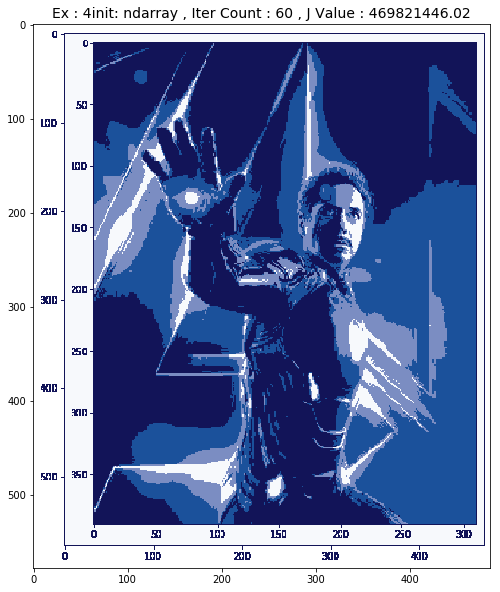

>> init=ndarray
initial mean : 
[[  0   0   0   0]
 [  1   1   1   1]
 [125 125 125 125]
 [250 250 250 250]
 [255 255 255 255]]


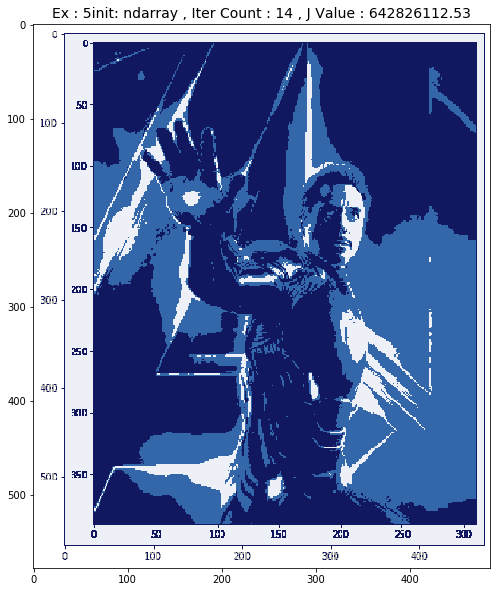

>> init=random


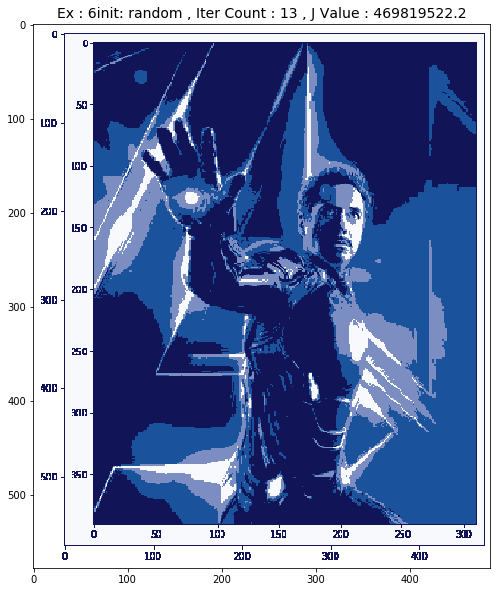

In [10]:
kMeanAlgo =kMeanRoleOfInitalization('image2.jpeg')
kMeanAlgo.showEffect()


In [11]:
df=pd.DataFrame(kMeanAlgo.tableData,columns = ['SNO', 'initiation Approach','Iteration Count','Distoration/J Value'])     
df.style.set_caption("Peformance of K Means with different type of initalizer ")
def highlight_cols(s):
    is_max = s == s.max()
    return ['background-color: red' if v else '' for v in is_max]

df.style.apply(highlight_cols, subset=pd.IndexSlice[:, ['Iteration Count','Distoration/J Value']])

,SNO,initiation Approach,Iteration Count,Distoration/J Value
0,1,k-means++,31,4.6982e+08
1,2,random,29,6.42813e+08
2,3,ndarray,42,4.6982e+08
3,4,ndarray,60,4.69821e+08
4,5,ndarray,14,6.42826e+08
5,6,random,13,4.6982e+08


<h3 style="color:blue">Learning Rate</h3> 
<p style="color:blue"> In case of large Data, KMeans does not perform well in compare of Mini Batch. The reason is KMeans loads complete data to find minima, while MiniBatch overcome this problem by randomly selecting the batch size data point and trying to find optimal solution. To find the optimal solution, it uses learning rate. As the data points increases the learning rate decrease and effect of learning rate on centroid become very less. By doing this we get centroid faster. <b style="color:red"> This effect is explained in other pynb file as its require custom development of mini batch algo </b></p> 
<p style="color:blue">Here we have explained one more comparison of Mini Batch vs KMeans (Or can say effect of initialization /batch size and learning rate). The comparison is done on following points (I have tuned the parameter to comparison) <ul style="color:blue"><li>Iteration Count --> As we increase cluster, both are taking almost same iteration (while mini batch does not use full data) </li><li>Distortion Value/J --> Same in both the case </li><li>Time Taken to Compute --> As cluster increases, K Means takes more time </li></ul></p>

In [16]:
def learningRate (imgName,n_clusters):
    ## Learning with K Mini Batch  
    #n_clusters=5
    figure_size=15

    img= mpimg.imread(imgName)
    x,y,z=img.shape
    image_2d = img.reshape(x *y, z)
    plt.figure(figsize=(figure_size,figure_size)) 

    print("Param  : Method for initialization init")
    print("1. init=‘k-means++’")
    init='k-means++'
    import time

    plt.figure(figsize=(figure_size,figure_size)) 



    a=time.time()
    km = KMeans( n_clusters=n_clusters,n_init=1,init=init,tol=1e-24)
    km.fit(image_2d  )
    b=time.time()
    print( "K Mean, Iteration Count :"+str(km.n_iter_)+"  Sum of squared distances  : "+str(km.inertia_)+" Time Taken : "+str(b-a))
    plt.subplot(1,2,1),plt.imshow(np.array(km.cluster_centers_[km.labels_].reshape(x, y, z),np.int32))
    plt.title("K Mean :   Iter  : "+str(km.n_iter_)+" , J Value : "+str(round(km.inertia_,2))+" Time : "+str(round(b-a,4)),fontdict={'fontsize': 14, 'fontweight': 'medium'})
    kArray =[km.n_iter_,km.inertia_,b-a]
    



    c=time.time()
    minikm = MiniBatchKMeans( n_clusters=n_clusters,n_init=1,init=init,tol=1e-24)
    minikm.fit(image_2d  )
    d=time.time()
    print( "Mini Batch Iteration Count :"+str(minikm.n_iter_)+"  Sum of squared distances  : "+str(minikm.inertia_)+" Time Taken : "+str(d-c))
    plt.subplot(1,2,2),plt.imshow(np.array(km.cluster_centers_[km.labels_].reshape(x, y, z),np.int32))
    plt.title("Mini Bath :   Iter : "+str(minikm.n_iter_)+" , J  : "+str(round(minikm.inertia_,2))+" Time : "+str(round(d-c,4)),fontdict={'fontsize': 14, 'fontweight': 'medium'})
    miniArray =[minikm.n_iter_,minikm.inertia_,d-c]
    plt.show()
    return [kArray,miniArray]

Param  : Method for initialization init
1. init=‘k-means++’
K Mean, Iteration Count :9  Sum of squared distances  : 1102649428.327755 Time Taken : 0.7340307235717773
Mini Batch Iteration Count :1451  Sum of squared distances  : 1102672793.7683034 Time Taken : 1.8349509239196777


<Figure size 1080x1080 with 0 Axes>

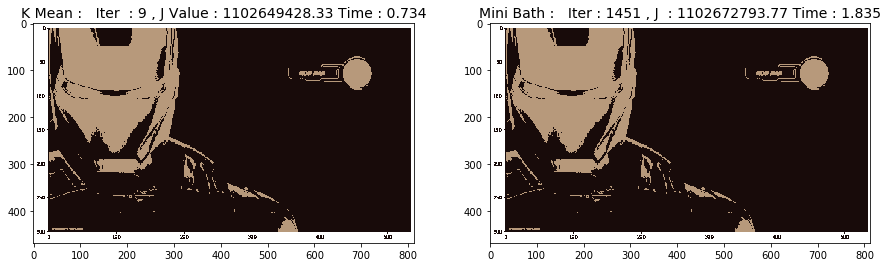

Param  : Method for initialization init
1. init=‘k-means++’
K Mean, Iteration Count :18  Sum of squared distances  : 580726875.8656622 Time Taken : 0.9715232849121094
Mini Batch Iteration Count :21  Sum of squared distances  : 585378087.3136326 Time Taken : 1.1935985088348389


<Figure size 1080x1080 with 0 Axes>

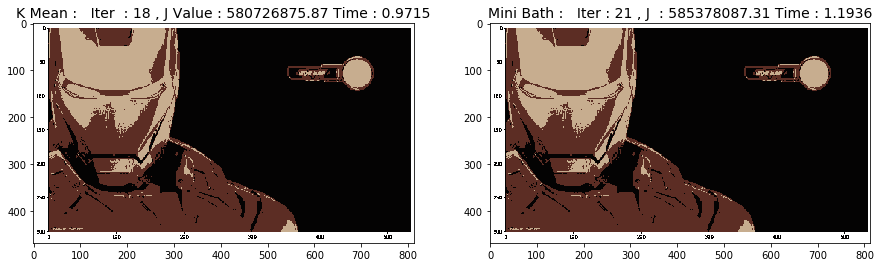

Param  : Method for initialization init
1. init=‘k-means++’
K Mean, Iteration Count :15  Sum of squared distances  : 315024888.8945817 Time Taken : 0.8826425075531006
Mini Batch Iteration Count :15  Sum of squared distances  : 317537599.76306784 Time Taken : 1.1599903106689453


<Figure size 1080x1080 with 0 Axes>

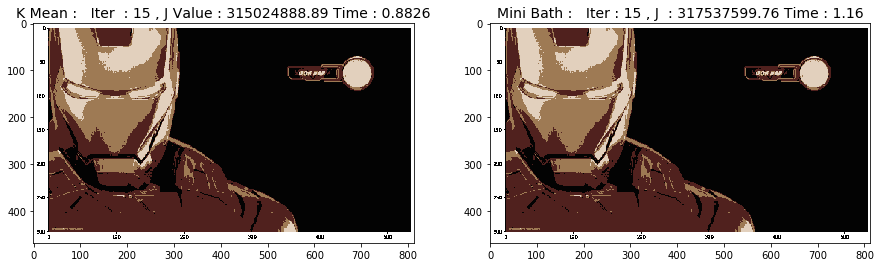

Param  : Method for initialization init
1. init=‘k-means++’
K Mean, Iteration Count :40  Sum of squared distances  : 252730328.32110217 Time Taken : 1.5480983257293701
Mini Batch Iteration Count :11  Sum of squared distances  : 262188056.70662296 Time Taken : 1.1657366752624512


<Figure size 1080x1080 with 0 Axes>

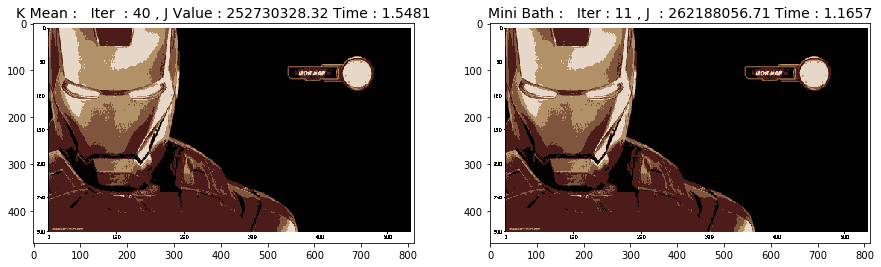

Param  : Method for initialization init
1. init=‘k-means++’
K Mean, Iteration Count :50  Sum of squared distances  : 217959079.1038025 Time Taken : 2.0590059757232666
Mini Batch Iteration Count :11  Sum of squared distances  : 229066400.51219967 Time Taken : 1.0714943408966064


<Figure size 1080x1080 with 0 Axes>

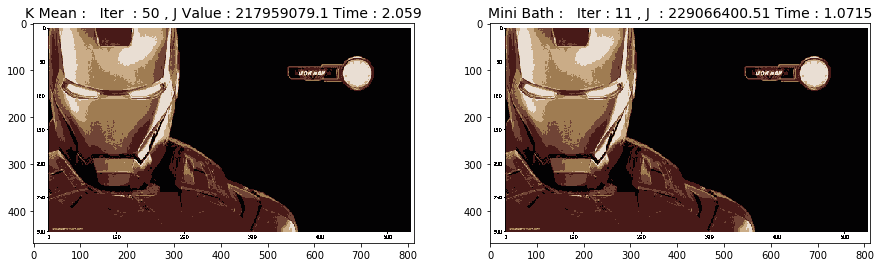

Param  : Method for initialization init
1. init=‘k-means++’
K Mean, Iteration Count :21  Sum of squared distances  : 184079525.1428484 Time Taken : 1.8279967308044434
Mini Batch Iteration Count :16  Sum of squared distances  : 186611811.32124734 Time Taken : 1.1156814098358154


<Figure size 1080x1080 with 0 Axes>

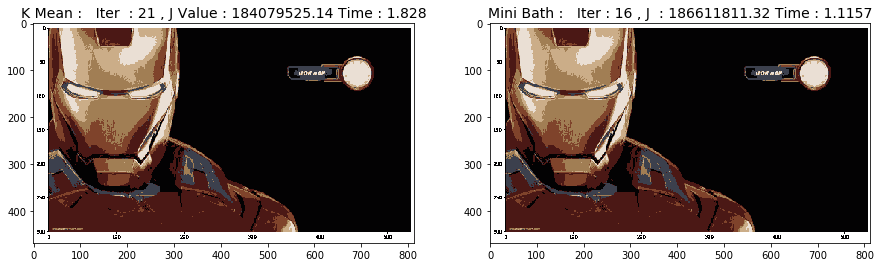

Param  : Method for initialization init
1. init=‘k-means++’
K Mean, Iteration Count :50  Sum of squared distances  : 176621035.55067682 Time Taken : 2.754267930984497
Mini Batch Iteration Count :11  Sum of squared distances  : 183658473.69838375 Time Taken : 1.1670825481414795


<Figure size 1080x1080 with 0 Axes>

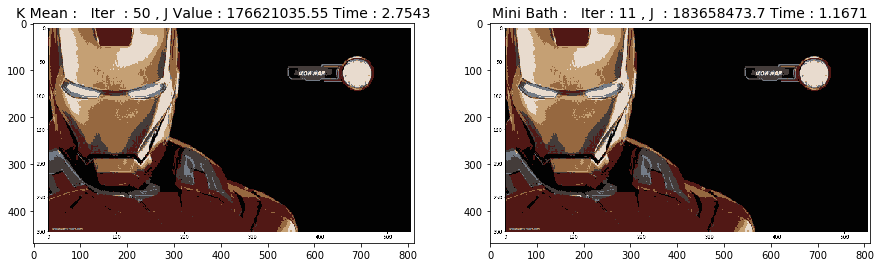

In [19]:
kMeansPer=[]
miniBatchPerf=[]
clusters=np.arange(3,10)

for index in clusters:
    res =learningRate ("Image1.jpeg",index)
    kMeansPer.append(res[0])
    miniBatchPerf.append(res[1])
    
    

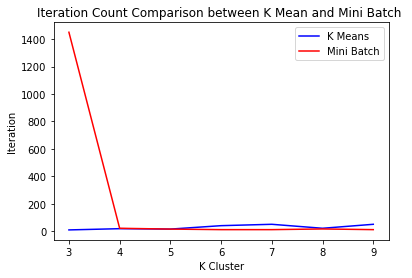

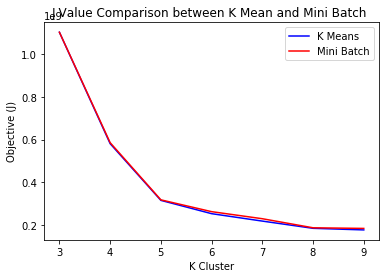

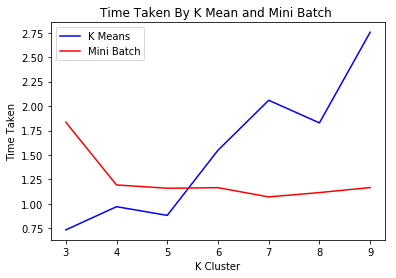

In [20]:
KM =np.array(kMeansPer)
KMini =np.array(miniBatchPerf)

plt.plot(clusters,KM[:,0],"-b", label="K Means")
plt.plot(clusters,KMini[:,0],"-r", label="Mini Batch")
plt.title("Iteration Count Comparison between K Mean and Mini Batch ") 
plt.xlabel('K Cluster')
plt.ylabel('Iteration')
plt.legend()
plt.show()


plt.plot(clusters,KM[:,1],"-b", label="K Means")
plt.plot(clusters,KMini[:,1],"-r", label="Mini Batch")
plt.title("J Value Comparison between K Mean and Mini Batch ") 
plt.xlabel('K Cluster')
plt.ylabel('Objective (J)')
plt.legend()
plt.show()


plt.plot(clusters,KM[:,2],"-b", label="K Means")
plt.plot(clusters,KMini[:,2],"-r", label="Mini Batch")
plt.title("Time Taken By K Mean and Mini Batch ") 
plt.xlabel('K Cluster')
plt.ylabel('Time Taken')
plt.legend()
plt.show()